<div dir='rtl'>
    <h1>سوال ۶</h1>
    ابتدا داده‌ها را لود می‌کنیم.
</div>

(10, 5, 192, 168)


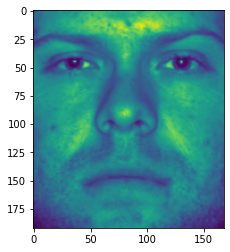

In [1]:
import numpy as np
import matplotlib.pyplot as plt

train = np.load('train.npy')
print(train.shape)
plt.imshow(train[0][0])
plt.show()
test = np.load('test.npy')

<div dir='rtl'>
از آنجایی که هر عکس ماتریس است، ابتدا ماتریس‌ها را به شکل بردار در می‌آوریم. حال هر داده یک بردار شده است.
</div>

In [2]:
X = np.zeros((train.shape[0]*train.shape[1], train.shape[2]*train.shape[3]))
z = 0
for i in range(train.shape[0]):
    for j in range(train.shape[1]):
        X[z] = train[i][j].flatten()
        z += 1

<div dir='rtl'>
    ابتدا میانگین را به دست می‌آوریم. سپس ماتریس X_tilda را می‌سازیم که در واقع X - mean است. حال باید بردار ویژه های ماتریس کواریانس را به دست آوریم. از آنجایی که ماتریس کواریانس ابعاد بزرگی دارد پس بردار ویژه های ترانهاده آن را به دست آورده و با ضرب کردن آن بردار ویژه ها در ترانهاده ماتریس X_tilda بردار ويژه‌های ماتریس کواریانس را به دست می‌آوریم.
</div>

\begin{equation}
XX^Tv = \lambda v \\
X^TX(X^T v) = \lambda (X^Tv)\\
\implies v' = X^T v
\end{equation}

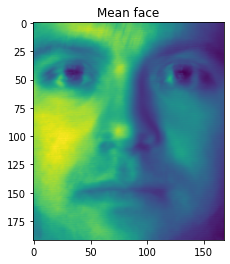

In [3]:
mean = np.zeros(X.shape[1])
for i in range(X.shape[0]):
    mean += X[i]
mean /= (X.shape[0])
plt.imshow(mean.reshape((192, 168)))
plt.title("Mean face")
plt.show()

<div dir='rtl'>
 حال همانند مراحل تدریس شده در اسلایدها عمل می‌کنیم. ابتدا میانگین داده‌ها را از هر داده کم کرده، سپس ماتریس کواریانس را برای X^T می‌سازیم و با روش گفته شده در قسمت قبل بردار ویژه‌های ماتریس کواریانس X را به دست می‌آوریم. سپس بردار های ویژه را یکه می‌کنیم.
</div>

In [4]:
X_tilda = np.zeros((X.shape[0], X.shape[1]))
for i in range(X.shape[0]):
    X_tilda[i] = X[i] - mean

In [5]:
S = np.matmul(X_tilda, X_tilda.T) / 50
lambdas, vs = np.linalg.eig(S)
vs.shape

(50, 50)

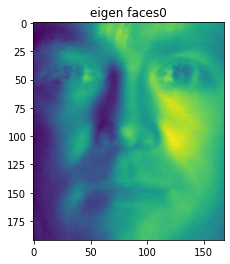

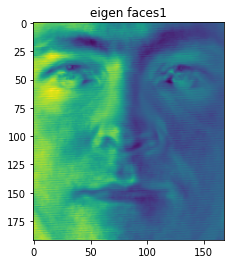

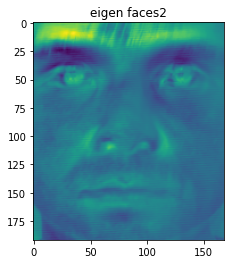

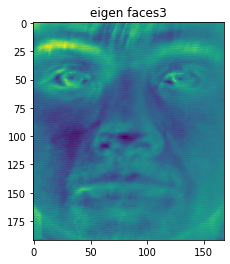

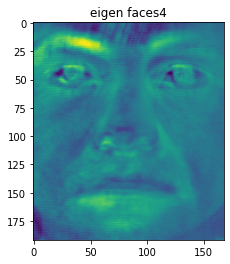

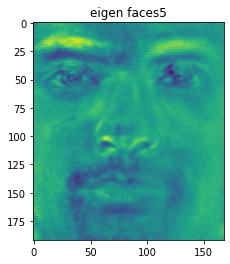

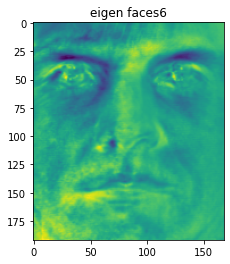

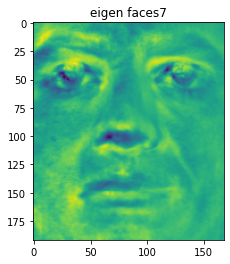

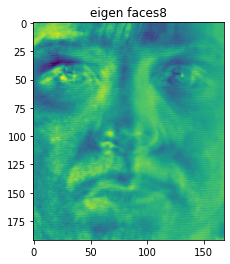

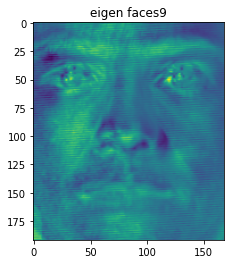

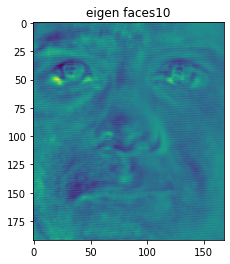

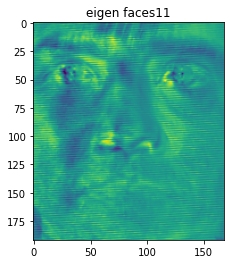

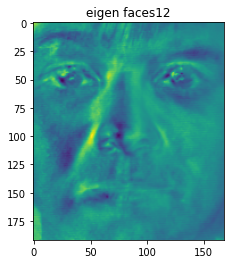

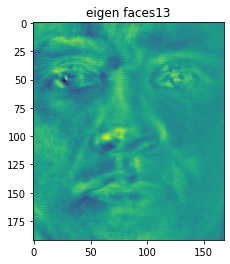

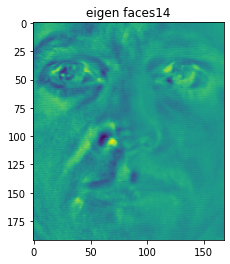

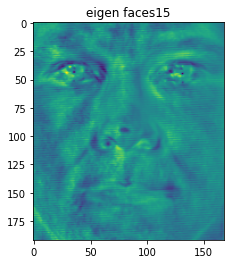

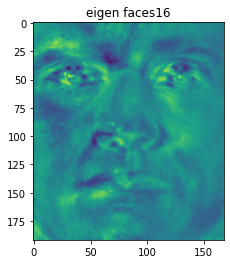

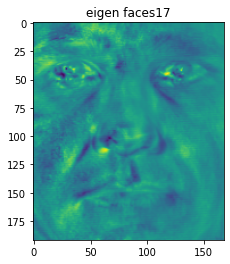

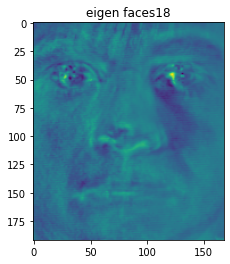

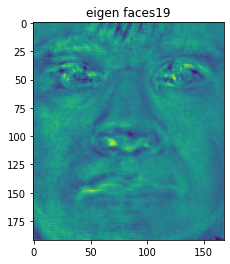

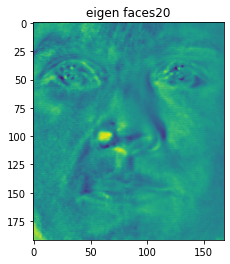

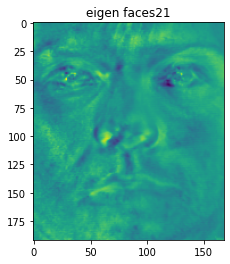

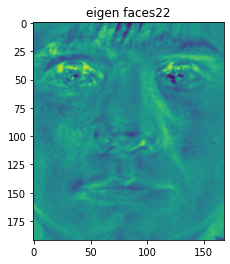

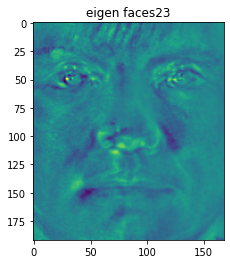

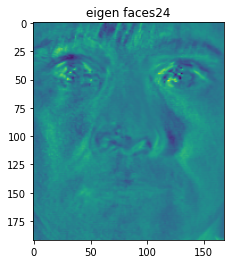

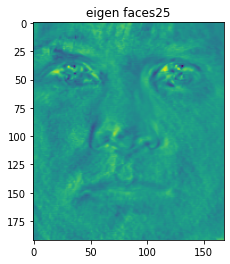

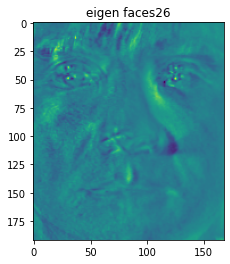

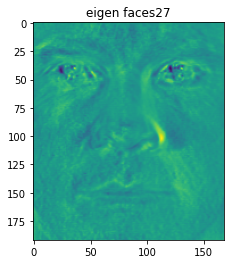

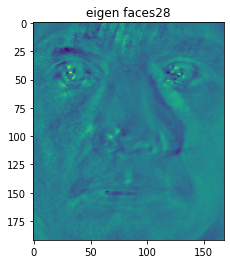

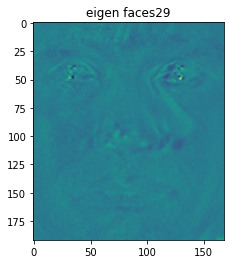

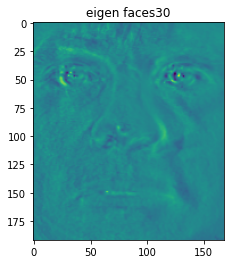

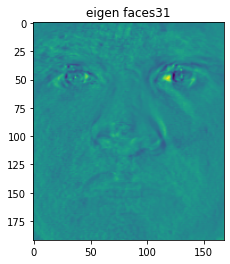

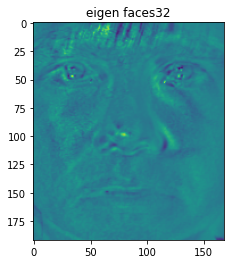

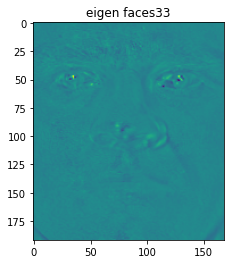

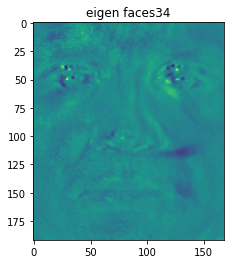

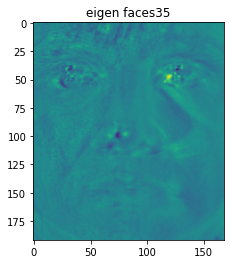

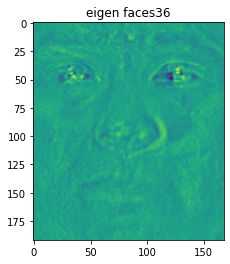

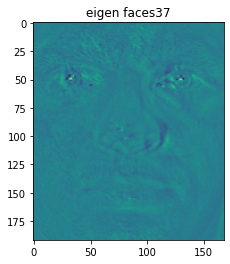

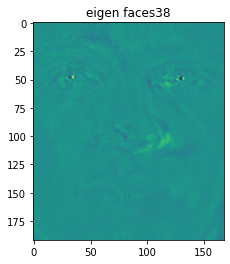

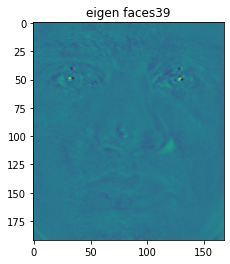

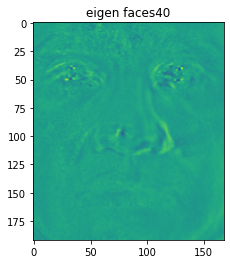

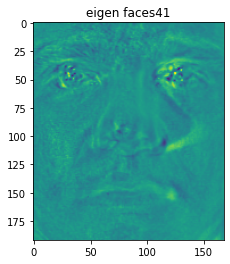

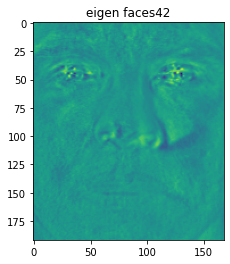

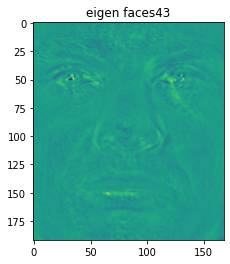

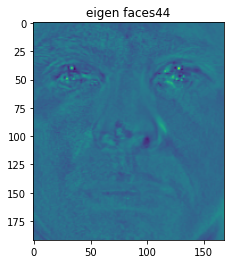

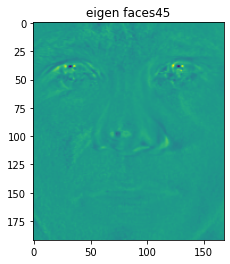

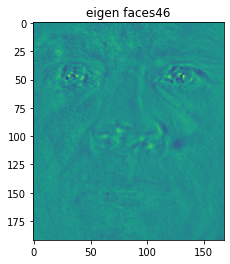

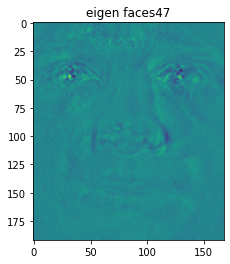

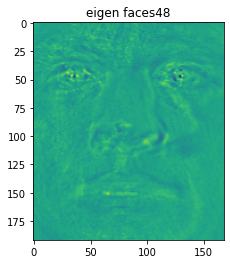

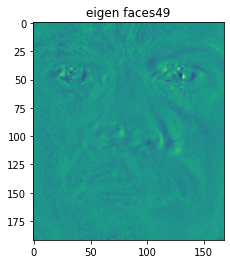

In [6]:
vs_prime = np.matmul(X_tilda.T, vs)
vs_prime = vs_prime.T
for i in range(X.shape[0]):
    plt.imshow((vs_prime[i]/ np.linalg.norm(vs_prime[i])).reshape((192, 168)))
    plt.title("eigen faces" + str(i))
    plt.show()

<div dir = 'rtl'>
    برای به دست آوردن بهترین بردار ویژه باید بزرگترین مقدار ویژه ها را پیدا کنیم. بردار ویژه‌های نظیر بزرگترین مقدار ویژه ها بهترین بردار ویژه ها خواهند بود.
    </div>

lambda 0 = 34360313.18602986


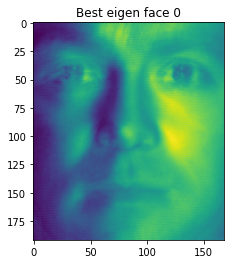

lambda 1 = 11986016.931745578


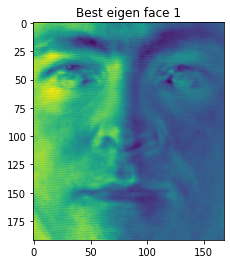

lambda 2 = 4582631.011756651


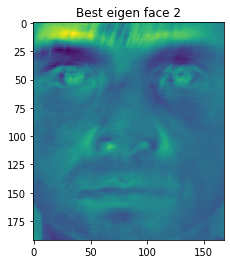

lambda 3 = 2243734.6189661953


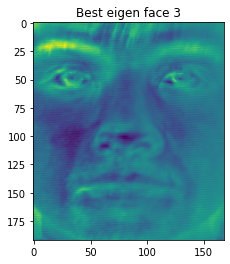

lambda 4 = 1989056.0253967233


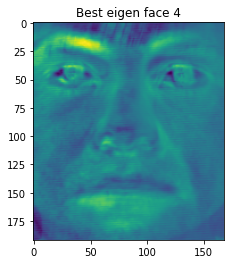

lambda 5 = 1295363.3787719586


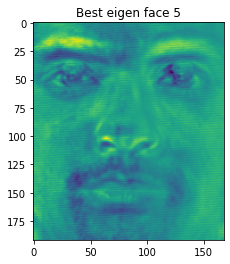

lambda 6 = 1168550.2871823814


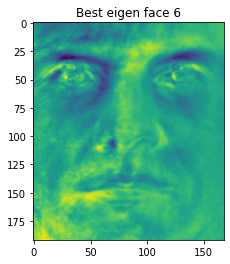

lambda 7 = 1032484.6885023961


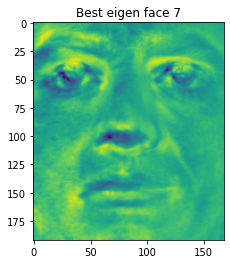

lambda 8 = 823586.4622195344


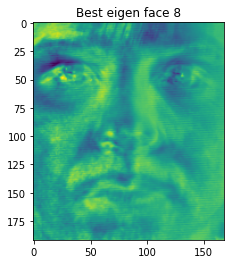

lambda 9 = 748014.0572785852


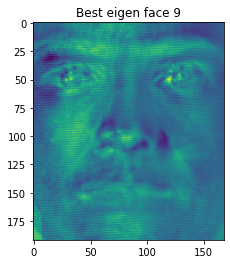

lambda 10 = 558743.3635074429


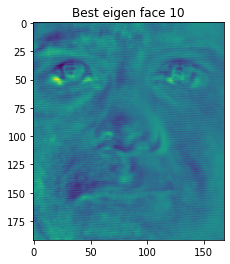

lambda 11 = 487377.2169586839


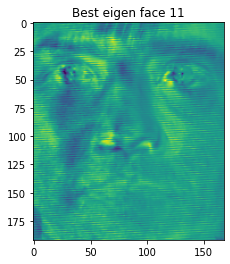

lambda 12 = 449121.02732725145


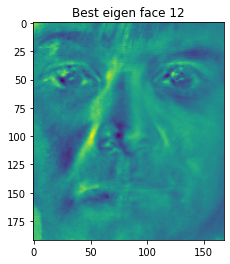

lambda 13 = 354493.92553527985


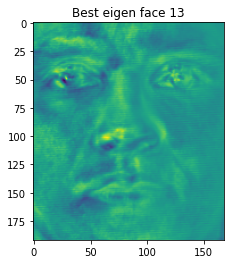

lambda 14 = 302453.43190684053


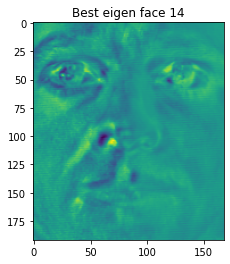

lambda 15 = 292534.8485632149


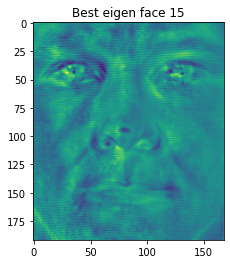

lambda 16 = 260461.2237182608


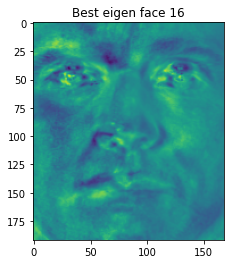

lambda 17 = 243183.7506774733


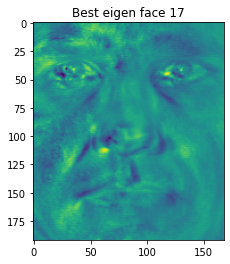

lambda 18 = 212260.39639807332


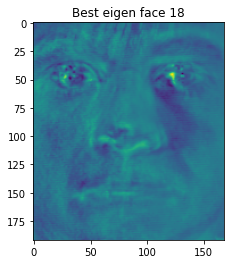

lambda 19 = 211412.10694151997


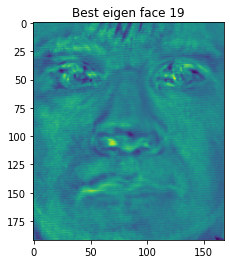

lambda 20 = 169314.67559339394


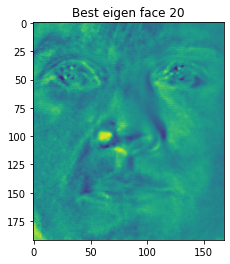

lambda 21 = 167528.80235222192


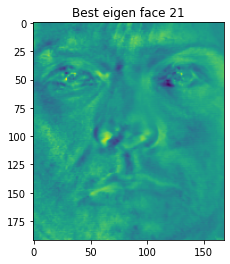

lambda 22 = 147042.19429265676


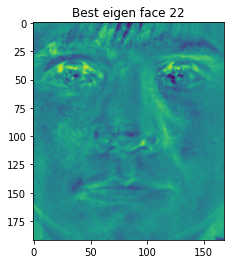

lambda 23 = 130583.69016014226


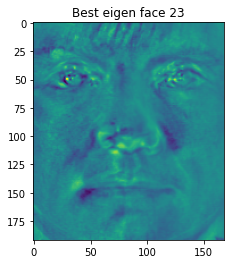

lambda 24 = 108178.40897152222


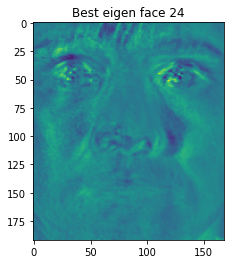

lambda 25 = 104528.16410610847


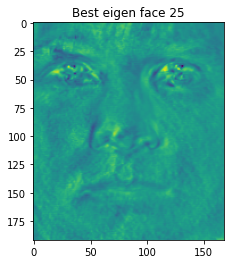

lambda 26 = 90791.32701526607


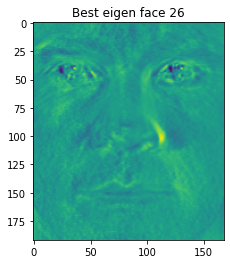

lambda 27 = 89361.57581774044


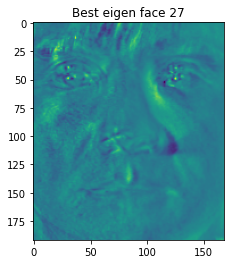

lambda 28 = 77241.22533773594


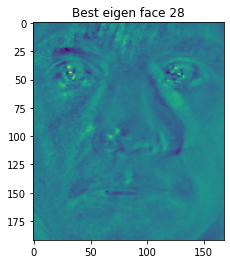

lambda 29 = 64063.56999163405


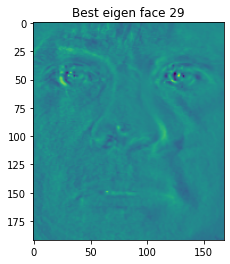

lambda 30 = 57963.54919689259


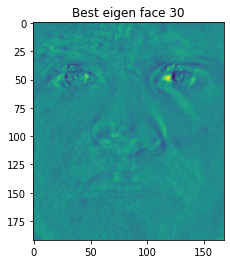

lambda 31 = 56400.839089519766


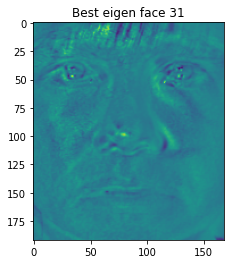

lambda 32 = 50863.43737776762


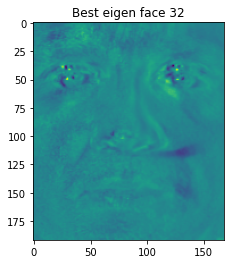

lambda 33 = 49303.81749219573


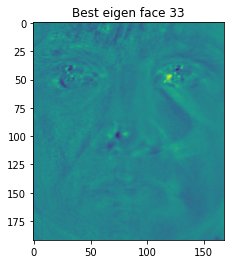

lambda 34 = 45862.69449189836


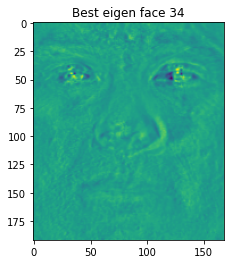

lambda 35 = 39037.970038410385


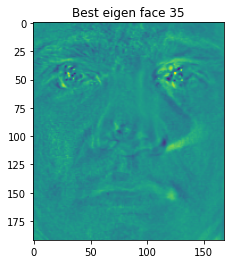

lambda 36 = 35677.13253466017


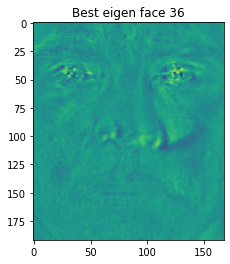

lambda 37 = 32651.394362896197


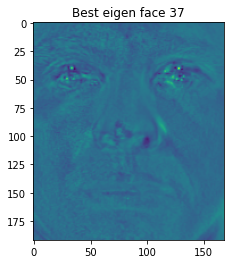

lambda 38 = 30808.404539534517


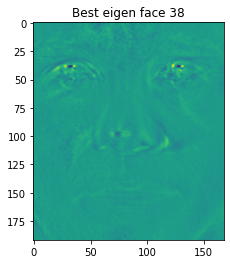

lambda 39 = 28806.780273317796


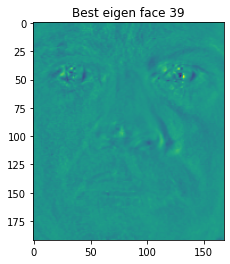

lambda 40 = 27559.043207958537


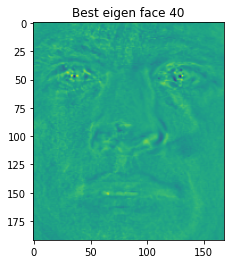

lambda 41 = 26138.690417109785


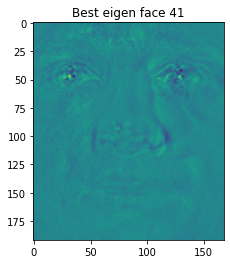

lambda 42 = 24733.893681728732


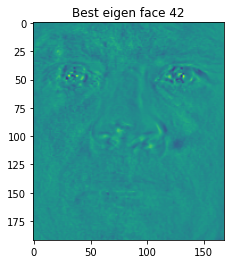

lambda 43 = 22082.63665041591


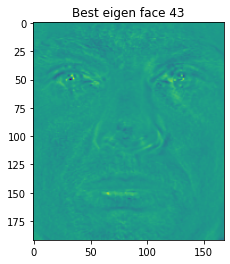

lambda 44 = 16809.745646583262


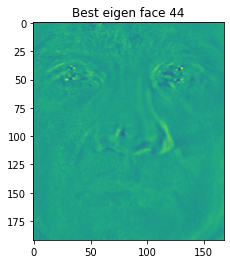

lambda 45 = 15222.404033196673


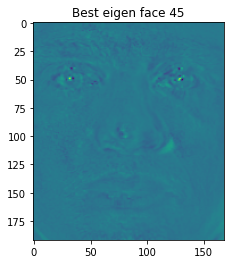

lambda 46 = 14753.831967596489


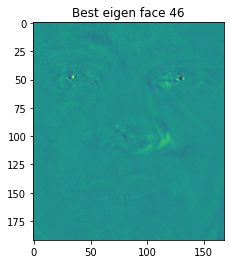

lambda 47 = 13921.895504933504


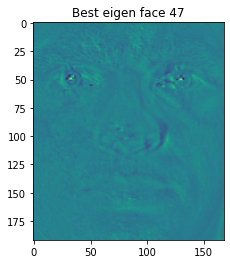

lambda 48 = 8255.6612711358


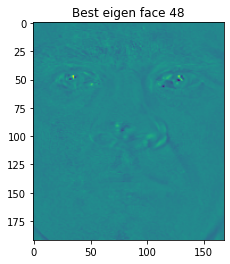

lambda 49 = 1.550788604080871e-10


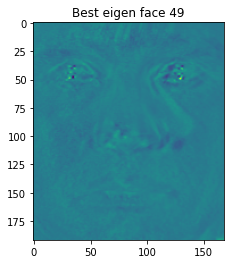

In [7]:
indices = (-lambdas).argsort()
A = np.zeros((vs_prime.shape[0], vs_prime.shape[1]))
for i in range(len(indices)):
    A[i] = vs_prime[indices[i]]/np.linalg.norm(vs_prime[indices[i]])
    print("lambda", i, "=", lambdas[indices[i]])
    plt.imshow(A[i].reshape((192, 168)))
    plt.title("Best eigen face "+ str(i))
    plt.show()

<div dir='rtl'>
حال برای بازسازی داده‌ها ابتدا X_prime را با استفاده از ضرب X_tilda در بردار ویژه‌ها می‌سازیم. سپس با ضرب X_prime در بردار ویژه ها و جمع حاصل با میانگین داده‌ها دوباره داده‌ها را بازسازی می‌کنیم. در اینجا داده‌ها را با تمام component ها بازسازی کردیم.
</div>

In [8]:
X_prime = np.dot(X_tilda, A.T)
# Reconstruction 
R = np.dot(X_prime, A) + mean

<div dir='rtl'>
    در اینجا با تمام ۵۰ تا component تصاویر را بازسازی کردیم. همانطور که می‌بینیم تفاوت تصاویر در رنگ آن هاست. عکس اصلی مقداری پررنگ‌تر از عکس بازسازی شده است. این به این دلیل است که سعی شده ۱۰۰ درصد واریانس بازسازی شود که خصوصیات عکس تا جای ممکن حفظ شود و برای این کار در آن مقدار ویژه‌های کوچک نیز مورد تاثیر قرار داده شده اند.
</div>

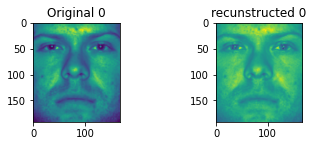

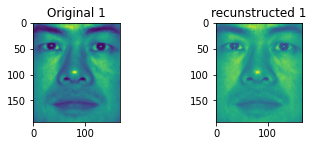

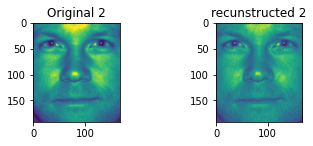

In [9]:
for i in [0, 5, 10]:
    plt.subplot(2,2,1)
    plt.imshow(X[i].reshape((192, 168)))
    plt.title('Original ' + str(i%4))
    plt.subplot(2,2,2)
    plt.imshow(R[i].reshape((192, 168)))
    plt.title('recunstructed ' + str(i%4))
    plt.show()

<div dir='rtl'>
    حال برای آنکه تعدادی کامپوننت را انتخاب کنیم که بالای ۹۰ درصد واریانس را بپوشانند از جمع مقادیر ویژه به دست آمده استفاده می‌کنیم (در اینجا بیشتر از ۹۵ درصد را انتخاب کردیم تا نتیجه بهتری به دست آوریم).
</div>

In [10]:
var = np.sum(lambdas)
v2 = 0
indice = 0
for i in range(len(lambdas)):
    v2 += lambdas[i]
    if v2 >= (0.95 * var):
        indice = i
        break
print(indice)

14


<div dir='rtl'>
    حال برای reconstruct کردن دیتا با componentهای انتخاب شده مانند قسمت قبل عمل می‌کنیم. همانطور که می‌بینیم عکس‌های بازسازی شده با دقت خوبی به تصاویر اصلی شبیه هستند. در حالی که به جای 32256 درایه برای ذخیره کردن هر عکس کافیست تنها از 15 درایه استفاده کنیم.
</div>

In [11]:
X_prime_2 = np.dot(X_tilda, A[0:indice+1].T)
# Reconstruction 
R_2= np.dot(X_prime_2, A[0:indice+1]) + mean

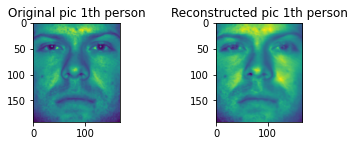

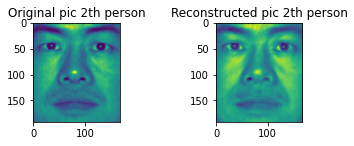

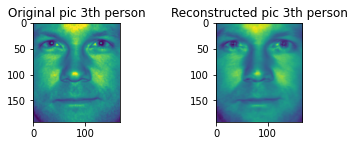

In [12]:
for i in [0, 5, 10]:
    plt.subplot(2,2,1)
    plt.imshow(X[i].reshape((192, 168)))
    plt.title('Original pic ' + str(i//5 + 1)+ 'th person')
    plt.subplot(2,2,2)
    plt.imshow(R_2[i].reshape((192, 168)))
    plt.title('Reconstructed pic ' + str(i//5 + 1)+ 'th person')
    plt.show()

<div dir='rtl'>
حال داده‌های تست را نیز با استفاده از روش بالا کاهش بعد می‌دهیم. حال دو Linear SVM classifier را با استفاده از عکس‌های کاهش بعد یافته و عکس های اصلی آموزش داده و دقت آن را روی داده تست می‌سنجیم.
</div>

In [13]:
X_test = np.zeros((test.shape[0]*test.shape[1], test.shape[2]*test.shape[3]))
z = 0
for i in range(test.shape[0]):
    for j in range(test.shape[1]):
        X_test[z] = test[i][j].flatten()
        z += 1
X_tilda_test = np.zeros((X_test.shape[0], X_test.shape[1]))
for i in range(X_test.shape[0]):
    X_tilda_test[i] = X_test[i] - mean
X_prime_test = np.dot(X_tilda_test, A[0:indice+1].T)

In [14]:
from sklearn import svm
X_prime_2 = np.dot(X_tilda, A[0:indice+1].T)
y = []
for i in range(50):
    y.append(i//5 + 1)
clf_1 = svm.SVC(kernel="linear")
clf_1.fit(X_prime_2 , y)
pred = clf_1.predict(X_prime_test)
y_test = []
for i in range(40):
    y_test.append(i//4 + 1)
print("Accuracy on test data with PCA: ", np.sum(pred == y_test)/40)

Accuracy on test data with PCA:  0.5


In [15]:
clf_2 = svm.SVC(kernel="linear")
clf_2.fit(X , y)
pred_2 = clf_2.predict(X_test)
print("Accuracy on test data without PCA: ", np.sum(pred_2 == y_test)/40)

Accuracy on test data without PCA:  0.525


<div dir='rtl'>
    همانطور که می‌بینیم دقت svm classifier روی داده‌های تست در حالی که روی داده‌های ترین آموزش داده‌شده است در حالتی که از pca استفاده نشود برابر با ۵۲.۵ درصد و در صورت استفاده از pca ماکسیمم ۵۰ درصد خواهد بود. <br>
    این نشان می‌دهد که در صورت استفاده از pca ابعاد داده ها از 50x32256 به ابعاد بسیار کوچکتری (مثلا اینجا 50x15) کاهش یافته است و دقت classifier نیز تنها ۲.۵ درصد کاهش پیدا کرده است. یادگیری کلسیفایر نیز به دلیل ابعاد کمتر داده‌های آن سریع‌تر است.
    پس به طور کلی می‌توان گفت PCA اندکی دقت کلسیفایر را کم کرده ولی ابعاد را به طور چشمگیری کاهش و سرعت آموزش را افزایش داده است.
</div>